## imports

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Loading data

In [4]:
with open("ass2.pickle", 'rb') as f:
    data = pickle.load(f)

trainX = np.array(data['train'].iloc[:,:-1].values)
trainY = np.array(data['train'].iloc[:,-1:].values)

devX = np.array(data['dev'].iloc[:,:-1].values)
devY = np.array(data['dev'].iloc[:,-1:].values)

testX = np.array(data['test'].iloc[:,:-1].values)
testY = np.array(data['test'].iloc[:,-1:].values)

## Preliminary Data Analysis

In [6]:
print(f"size of train: {len(data['train'])}")
print(f"size of test: {len(data['test'])}")
print(f"size of dev: {len(data['dev'])}")

size of train: 40533
size of test: 13512
size of dev: 13512


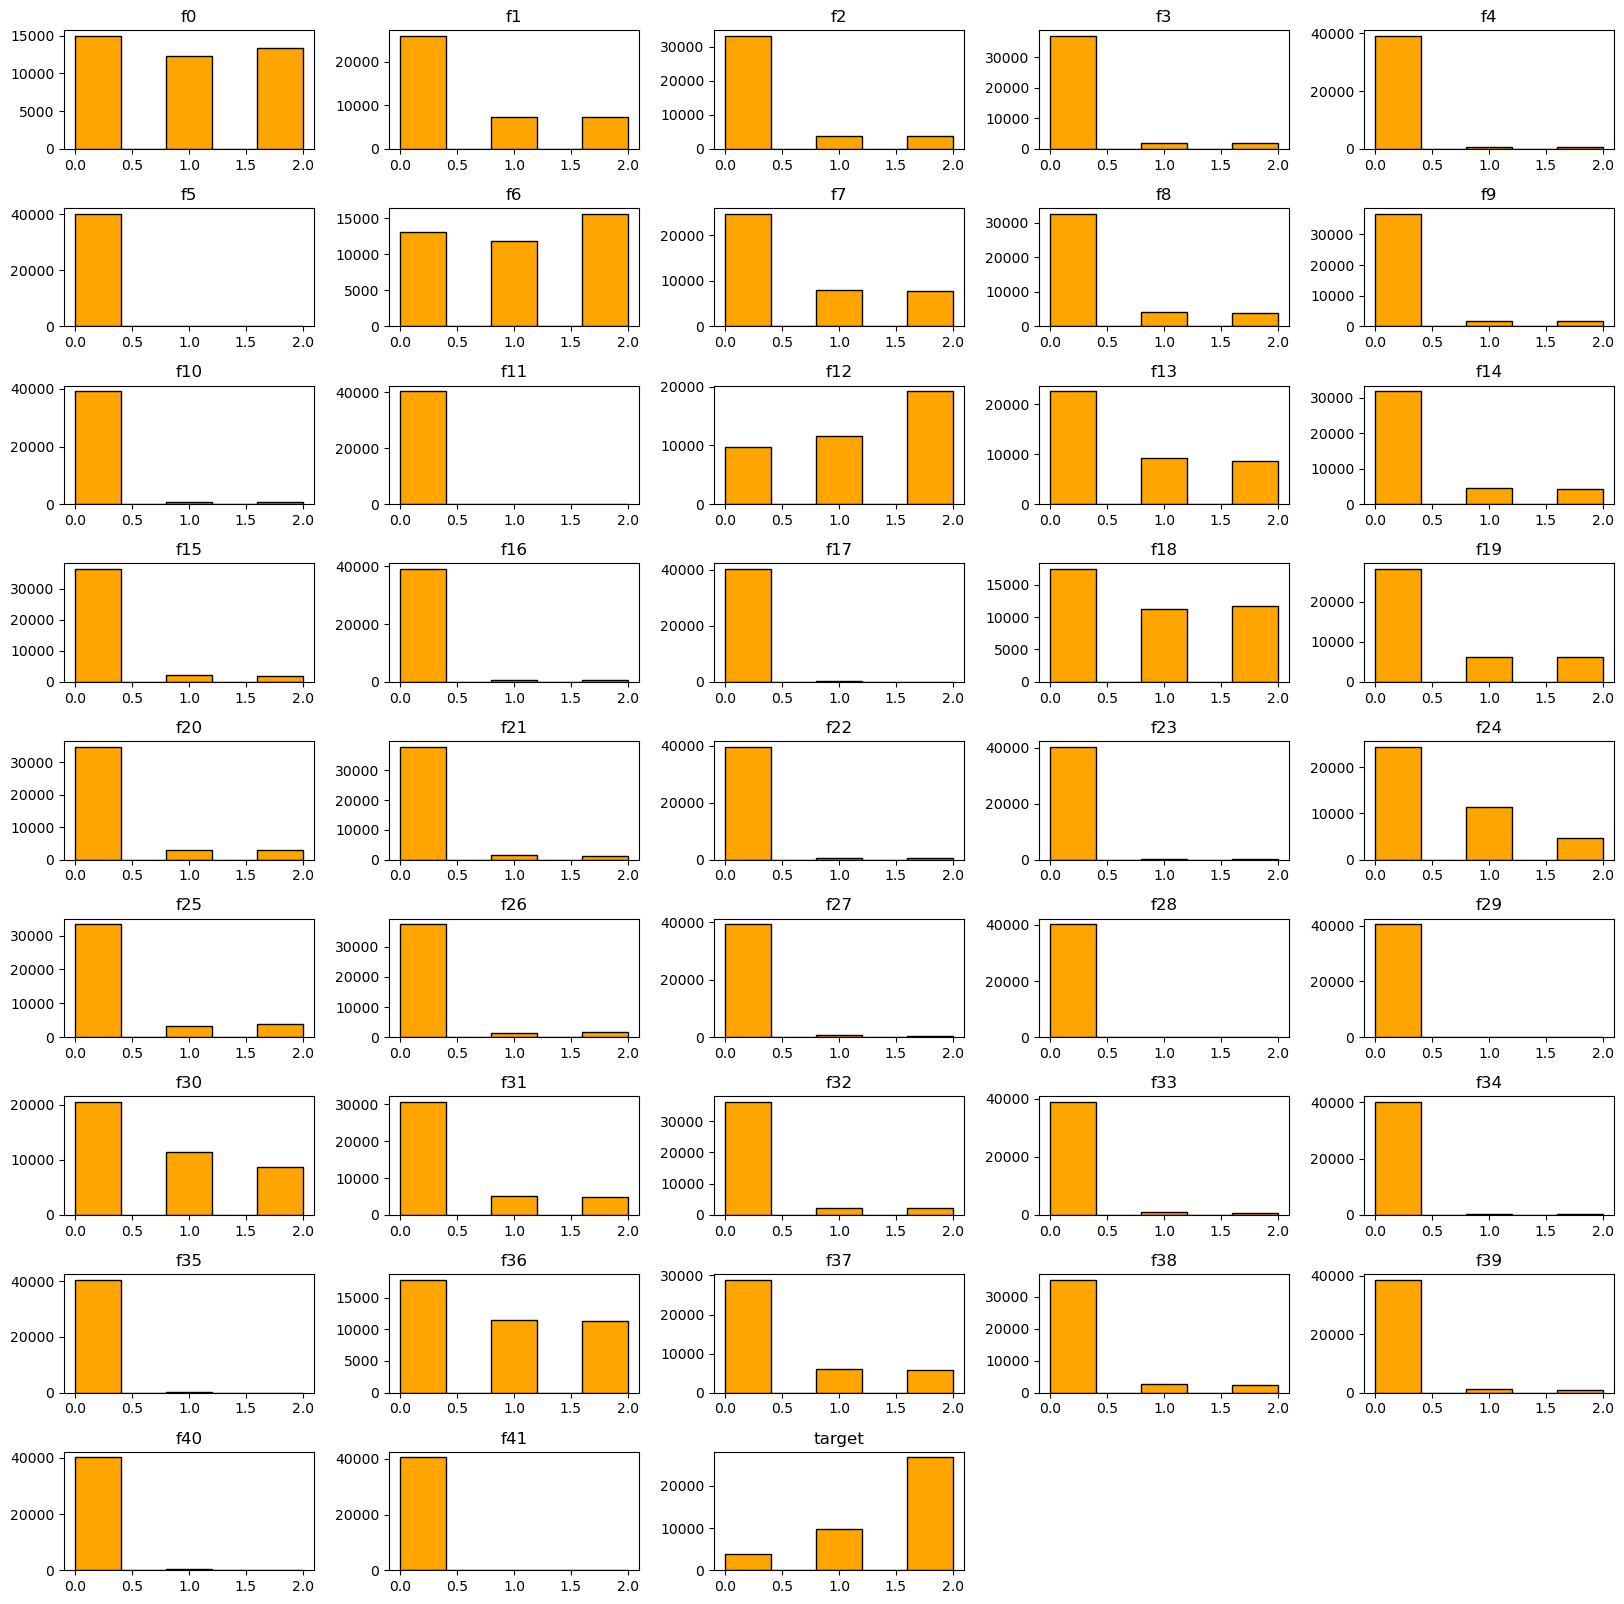

In [8]:
# Convert data to pandas dataframes
train_df = pd.DataFrame(data['train'])

# Explore the distribution of features
fig, axs = plt.subplots(nrows=9, ncols=5, figsize=(20, 20), gridspec_kw={"hspace": 0.5, "wspace": 0.3})
axs = axs.ravel()
for i, column in enumerate(train_df.columns):
    axs[i].hist(train_df[column], bins=5, edgecolor='black', color='orange')
    axs[i].set_title(column)
    
axs[-1].set_visible(False)
axs[-2].set_visible(False)
plt.show()


in the distribution of features we can see that many are almost always 0 and barely any other values.

if computation gets too rought, we could probably shrink the dimention of our data using PCA without losing much.

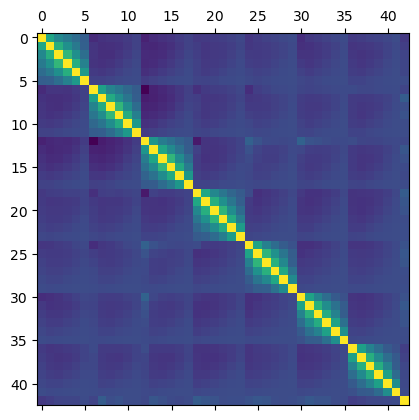

In [34]:
# Look for correlations between features
corr_matrix = train_df.corr()
plt.matshow(corr_matrix)
plt.show()

heatmap showing correlation between different features

In [48]:
train_devX = np.concatenate((trainX, devX), axis=0)
train_devY = np.concatenate((trainY, devY), axis=0)

models = [
          ('RandomForest', RandomForestClassifier()), 
        #   ('AdaBoost', AdaBoostClassifier()),
        #   ('KNN', KNeighborsClassifier()),
        #   ('XGB', XGBClassifier()),
        #   ('SVC', SVC())
        ]

param_grid = {
    'RandomForest':{
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost':{},
    'KNN':{},
    'XGB':{},
    'SVC':{}
}
accuracy_scores = []
for model in models:
    grid_search = GridSearchCV(estimator=model[1], param_grid=param_grid[model[0]], cv=5)
    grid_search.fit(train_devX, train_devY)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    predY = best_model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    accuracy_scores.append(accuracy)
    print(f"{model[0]}: ")
    print(f"Best Parameters: {best_params}")
    print(f"Best score: {best_score}")
    print(f"Accuracy: {accuracy}")

best_model_index = accuracy_scores.index(max(accuracy_scores))



{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8138691533451746
